<a href="https://colab.research.google.com/github/saurabhIU/Deep-Learning/blob/master/Network_Compression_Using_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Note: I am using latest Tensorflow version 2.0 which was released recently. For network building I am using Keras with custom layers

## Dependencies

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Install Tensorflow 2.0.0

In [2]:

! pip install tensorflow-gpu==2.0.0-alpha0

    100% |████████████████████████████████| 332.1MB 57kB/s 
    100% |████████████████████████████████| 3.0MB 8.0MB/s 
    100% |████████████████████████████████| 419kB 10.6MB/s 
    100% |████████████████████████████████| 61kB 16.5MB/s 


In [2]:
tf.__version__

'2.0.0-alpha0'

In [0]:

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

##Neural Network with 5 Layers each having 1024 units

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024,activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1024,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1024,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1024,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1024,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))


## Compile and Fit model

In [86]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 21s 351us/sample - loss: 0.2742 - accuracy: 0.9241
Epoch 2/5
60000/60000 [==============================] - 20s 337us/sample - loss: 0.1385 - accuracy: 0.9637
Epoch 3/5
60000/60000 [==============================] - 20s 340us/sample - loss: 0.1047 - accuracy: 0.9718
Epoch 4/5
60000/60000 [==============================] - 20s 341us/sample - loss: 0.0792 - accuracy: 0.9783
Epoch 5/5
60000/60000 [==============================] - 20s 340us/sample - loss: 0.0676 - accuracy: 0.9820


## Evaluate model

In [87]:
loss, acc = model.evaluate(x_test,y_test)

print("Loss {}, Accuracy {}".format(loss, acc))

10000/10000 [==============================] - 1s 133us/sample - loss: 0.1161 - accuracy: 0.9748
Loss 0.1161006328253803, Accuracy 0.9747999906539917


## Singular value decomposition of each dense layer except output layer

In [0]:
#Weights of each layer
layer1_weights = model.get_layer(index=1).get_weights()[0]
layer2_weights = model.get_layer(index=3).get_weights()[0]
layer3_weights = model.get_layer(index=4).get_weights()[0]
layer4_weights = model.get_layer(index=5).get_weights()[0]
layer5_weights = model.get_layer(index=6).get_weights()[0]


#Biases of each layer
layer1_bias = model.get_layer(index=1).get_weights()[1]
layer2_bias = model.get_layer(index=3).get_weights()[1]
layer3_bias = model.get_layer(index=4).get_weights()[1]
layer4_bias = model.get_layer(index=5).get_weights()[1]
layer5_bias = model.get_layer(index=6).get_weights()[1]

In [0]:
s1, u1, v1 = tf.linalg.svd(layer1_weights )
s2, u2, v2 = tf.linalg.svd(layer2_weights )
s3, u3, v3 = tf.linalg.svd(layer3_weights )
s4, u4, v4 = tf.linalg.svd(layer4_weights )
s5, u5, v5 = tf.linalg.svd(layer5_weights )

In [0]:
D_Values = [10,20,50,100,200,784]
test_accuracies = []

## Compress weights with D = 10

In [0]:
D = 10

W1_New , W2_New, W3_New, W4_New, W5_New = [] , [], [], [], []

W_L1 = tf.matmul(u1[:,0:D], tf.matmul(tf.linalg.diag(s1)[0:D,0:D], v1[:,0:D], adjoint_b=True))
W_L2 = tf.matmul(u2[:,0:D], tf.matmul(tf.linalg.diag(s2)[0:D,0:D], v2[:,0:D], adjoint_b=True))
W_L3 = tf.matmul(u3[:,0:D], tf.matmul(tf.linalg.diag(s3)[0:D,0:D], v3[:,0:D], adjoint_b=True))
W_L4 = tf.matmul(u4[:,0:D], tf.matmul(tf.linalg.diag(s4)[0:D,0:D], v4[:,0:D], adjoint_b=True))
W_L5 = tf.matmul(u5[:,0:D], tf.matmul(tf.linalg.diag(s5)[0:D,0:D], v5[:,0:D], adjoint_b=True))

In [0]:
W1_New.append(W_L1)
W1_New.append(layer1_bias)

W2_New.append(W_L2)
W2_New.append(layer2_bias)

W3_New.append(W_L3)
W3_New.append(layer3_bias)

W4_New.append(W_L4)
W4_New.append(layer4_bias)

W5_New.append(W_L5)
W5_New.append(layer5_bias)

In [0]:
model.get_layer(index=1).set_weights(W1_New)
model.get_layer(index=3).set_weights(W2_New)
model.get_layer(index=4).set_weights(W3_New)
model.get_layer(index=5).set_weights(W4_New)
model.get_layer(index=6).set_weights(W5_New)

In [95]:
loss, acc = model.evaluate(x_test,y_test)
test_accuracies.append(acc)
print("Loss {}, Accuracy {}".format(loss, acc))

10000/10000 [==============================] - 1s 110us/sample - loss: 0.7487 - accuracy: 0.8092
Loss 0.7487141182422637, Accuracy 0.8091999888420105


## Compress weights with D = 20

In [0]:
D = 20

W1_New , W2_New, W3_New, W4_New, W5_New = [] , [], [], [], []

W_L1 = tf.matmul(u1[:,0:D], tf.matmul(tf.linalg.diag(s1)[0:D,0:D], v1[:,0:D], adjoint_b=True))
W_L2 = tf.matmul(u2[:,0:D], tf.matmul(tf.linalg.diag(s2)[0:D,0:D], v2[:,0:D], adjoint_b=True))
W_L3 = tf.matmul(u3[:,0:D], tf.matmul(tf.linalg.diag(s3)[0:D,0:D], v3[:,0:D], adjoint_b=True))
W_L4 = tf.matmul(u4[:,0:D], tf.matmul(tf.linalg.diag(s4)[0:D,0:D], v4[:,0:D], adjoint_b=True))
W_L5 = tf.matmul(u5[:,0:D], tf.matmul(tf.linalg.diag(s5)[0:D,0:D], v5[:,0:D], adjoint_b=True))

In [0]:
W1_New.append(W_L1)
W1_New.append(layer1_bias)

W2_New.append(W_L2)
W2_New.append(layer2_bias)

W3_New.append(W_L3)
W3_New.append(layer3_bias)

W4_New.append(W_L4)
W4_New.append(layer4_bias)

W5_New.append(W_L5)
W5_New.append(layer5_bias)

In [0]:
model.get_layer(index=1).set_weights(W1_New)
model.get_layer(index=3).set_weights(W2_New)
model.get_layer(index=4).set_weights(W3_New)
model.get_layer(index=5).set_weights(W4_New)
model.get_layer(index=6).set_weights(W5_New)

In [99]:
loss, acc = model.evaluate(x_test,y_test)
test_accuracies.append(acc)

print("Loss {}, Accuracy {}".format(loss, acc))

10000/10000 [==============================] - 1s 127us/sample - loss: 0.1547 - accuracy: 0.9643
Loss 0.15474563783109188, Accuracy 0.9642999768257141


## Compress weights with D = 50

In [0]:
D = 50
W1_New , W2_New, W3_New, W4_New, W5_New = [] , [], [], [], []
W_L1 = tf.matmul(u1[:,0:D], tf.matmul(tf.linalg.diag(s1)[0:D,0:D], v1[:,0:D], adjoint_b=True))
W_L2 = tf.matmul(u2[:,0:D], tf.matmul(tf.linalg.diag(s2)[0:D,0:D], v2[:,0:D], adjoint_b=True))
W_L3 = tf.matmul(u3[:,0:D], tf.matmul(tf.linalg.diag(s3)[0:D,0:D], v3[:,0:D], adjoint_b=True))
W_L4 = tf.matmul(u4[:,0:D], tf.matmul(tf.linalg.diag(s4)[0:D,0:D], v4[:,0:D], adjoint_b=True))
W_L5 = tf.matmul(u5[:,0:D], tf.matmul(tf.linalg.diag(s5)[0:D,0:D], v5[:,0:D], adjoint_b=True))

In [0]:
W1_New.append(W_L1)
W1_New.append(layer1_bias)

W2_New.append(W_L2)
W2_New.append(layer2_bias)

W3_New.append(W_L3)
W3_New.append(layer3_bias)

W4_New.append(W_L4)
W4_New.append(layer4_bias)

W5_New.append(W_L5)
W5_New.append(layer5_bias)

In [0]:
model.get_layer(index=1).set_weights(W1_New)
model.get_layer(index=3).set_weights(W2_New)
model.get_layer(index=4).set_weights(W3_New)
model.get_layer(index=5).set_weights(W4_New)
model.get_layer(index=6).set_weights(W5_New)

In [103]:
loss, acc = model.evaluate(x_test,y_test)
test_accuracies.append(acc)
print("Loss {}, Accuracy {}".format(loss, acc))

10000/10000 [==============================] - 1s 125us/sample - loss: 0.1016 - accuracy: 0.9755
Loss 0.10159684086467605, Accuracy 0.9754999876022339


## Compress weights with D = 100

In [0]:
D = 100

W1_New , W2_New, W3_New, W4_New, W5_New = [] , [], [], [], []
W_L1 = tf.matmul(u1[:,0:D], tf.matmul(tf.linalg.diag(s1)[0:D,0:D], v1[:,0:D], adjoint_b=True))
W_L2 = tf.matmul(u2[:,0:D], tf.matmul(tf.linalg.diag(s2)[0:D,0:D], v2[:,0:D], adjoint_b=True))
W_L3 = tf.matmul(u3[:,0:D], tf.matmul(tf.linalg.diag(s3)[0:D,0:D], v3[:,0:D], adjoint_b=True))
W_L4 = tf.matmul(u4[:,0:D], tf.matmul(tf.linalg.diag(s4)[0:D,0:D], v4[:,0:D], adjoint_b=True))
W_L5 = tf.matmul(u5[:,0:D], tf.matmul(tf.linalg.diag(s5)[0:D,0:D], v5[:,0:D], adjoint_b=True))

In [0]:
W1_New.append(W_L1)
W1_New.append(layer1_bias)

W2_New.append(W_L2)
W2_New.append(layer2_bias)

W3_New.append(W_L3)
W3_New.append(layer3_bias)

W4_New.append(W_L4)
W4_New.append(layer4_bias)

W5_New.append(W_L5)
W5_New.append(layer5_bias)

In [0]:
model.get_layer(index=1).set_weights(W1_New)
model.get_layer(index=3).set_weights(W2_New)
model.get_layer(index=4).set_weights(W3_New)
model.get_layer(index=5).set_weights(W4_New)
model.get_layer(index=6).set_weights(W5_New)

In [107]:
loss, acc = model.evaluate(x_test,y_test)
test_accuracies.append(acc)

10000/10000 [==============================] - 1s 125us/sample - loss: 0.1033 - accuracy: 0.9758


## Compress weights with D = 200

In [0]:
D = 200

W1_New , W2_New, W3_New, W4_New, W5_New = [] , [], [], [], []
W_L1 = tf.matmul(u1[:,0:D], tf.matmul(tf.linalg.diag(s1)[0:D,0:D], v1[:,0:D], adjoint_b=True))
W_L2 = tf.matmul(u2[:,0:D], tf.matmul(tf.linalg.diag(s2)[0:D,0:D], v2[:,0:D], adjoint_b=True))
W_L3 = tf.matmul(u3[:,0:D], tf.matmul(tf.linalg.diag(s3)[0:D,0:D], v3[:,0:D], adjoint_b=True))
W_L4 = tf.matmul(u4[:,0:D], tf.matmul(tf.linalg.diag(s4)[0:D,0:D], v4[:,0:D], adjoint_b=True))
W_L5 = tf.matmul(u5[:,0:D], tf.matmul(tf.linalg.diag(s5)[0:D,0:D], v5[:,0:D], adjoint_b=True))

In [0]:
W1_New.append(W_L1)
W1_New.append(layer1_bias)

W2_New.append(W_L2)
W2_New.append(layer2_bias)

W3_New.append(W_L3)
W3_New.append(layer3_bias)

W4_New.append(W_L4)
W4_New.append(layer4_bias)

W5_New.append(W_L5)
W5_New.append(layer5_bias)

In [0]:
model.get_layer(index=1).set_weights(W1_New)
model.get_layer(index=3).set_weights(W2_New)
model.get_layer(index=4).set_weights(W3_New)
model.get_layer(index=5).set_weights(W4_New)
model.get_layer(index=6).set_weights(W5_New)

In [111]:
loss, acc = model.evaluate(x_test,y_test)
test_accuracies.append(acc)

10000/10000 [==============================] - 1s 129us/sample - loss: 0.1075 - accuracy: 0.9751


## Compress weights with D = 784

In [0]:
D = 784

W1_New , W2_New, W3_New, W4_New, W5_New = [] , [], [], [], []
W_L1 = tf.matmul(u1, tf.matmul(tf.linalg.diag(s1), v1, adjoint_b=True))
W_L2 = tf.matmul(u2, tf.matmul(tf.linalg.diag(s2), v2, adjoint_b=True))
W_L3 = tf.matmul(u3, tf.matmul(tf.linalg.diag(s3), v3, adjoint_b=True))
W_L4 = tf.matmul(u4, tf.matmul(tf.linalg.diag(s4), v4, adjoint_b=True))
W_L5 = tf.matmul(u5, tf.matmul(tf.linalg.diag(s5), v5, adjoint_b=True))

In [0]:
W1_New.append(W_L1)
W1_New.append(layer1_bias)

W2_New.append(W_L2)
W2_New.append(layer2_bias)

W3_New.append(W_L3)
W3_New.append(layer3_bias)

W4_New.append(W_L4)
W4_New.append(layer4_bias)

W5_New.append(W_L5)
W5_New.append(layer5_bias)

In [0]:
model.get_layer(index=1).set_weights(W1_New)
model.get_layer(index=3).set_weights(W2_New)
model.get_layer(index=4).set_weights(W3_New)
model.get_layer(index=5).set_weights(W4_New)
model.get_layer(index=6).set_weights(W5_New)

In [115]:
loss, acc = model.evaluate(x_test,y_test)
test_accuracies.append(acc)

10000/10000 [==============================] - 1s 125us/sample - loss: 0.1161 - accuracy: 0.9748


In [116]:
test_accuracies

[0.8092, 0.9643, 0.9755, 0.9758, 0.9751, 0.9748]

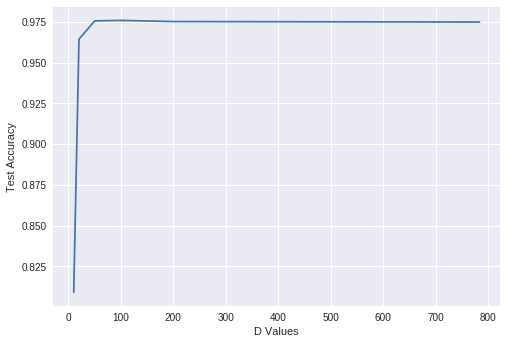

In [117]:
plt.plot(D_Values,test_accuracies)
plt.ylabel('Test Accuracy')
plt.xlabel('D Values')
plt.show()

## Imrove performance for D = 20

In [0]:
D = 20
W1_D20 , W2_D20, W3_D20, W4_D20, W5_D20 = [] , [], [], [], []

V1 = tf.matmul(tf.linalg.diag(s1)[0:D,0:D],tf.transpose(v1[:,0:D]))
U1 = u1[:,0:D]
W1_Trainable = tf.matmul(U1,V1)
W1_D20.append(W1_Trainable)
W1_D20.append(layer1_bias)

V2 = tf.matmul(tf.linalg.diag(s2)[0:D,0:D],tf.transpose(v2[:,0:D]))
U2 = u2[:,0:D]
W2_Trainable = tf.matmul(U2,V2)
W2_D20.append(W2_Trainable)
W2_D20.append(layer2_bias)

V3 = tf.matmul(tf.linalg.diag(s3)[0:D,0:D],tf.transpose(v3[:,0:D]))
U3 = u3[:,0:D]
W3_Trainable = tf.matmul(U3,V3)
W3_D20.append(W3_Trainable)
W3_D20.append(layer3_bias)


V4 = tf.matmul(tf.linalg.diag(s4)[0:D,0:D],tf.transpose(v4[:,0:D]))
U4 = u4[:,0:D]
W4_Trainable = tf.matmul(U4,V4)
W4_D20.append(W4_Trainable)
W4_D20.append(layer4_bias)

V5 = tf.matmul(tf.linalg.diag(s5)[0:D,0:D],tf.transpose(v5[:,0:D]))
U5 = u5[:,0:D]
W5_Trainable = tf.matmul(U5,V5)
W5_D20.append(W5_Trainable)
W5_D20.append(layer5_bias)

In [125]:
W1_Trainable

<tf.Tensor: id=203461, shape=(784, 1024), dtype=float32, numpy=
array([[ 0.00859985, -0.00434499, -0.00132128, ...,  0.00423206,
         0.01004207,  0.01050401],
       [-0.00403642, -0.00027502,  0.0004445 , ...,  0.00448619,
        -0.00123648,  0.01394461],
       [ 0.00542708, -0.00310671, -0.00078038, ...,  0.00043396,
        -0.00131999,  0.00311533],
       ...,
       [-0.00126823, -0.00668354, -0.00016347, ..., -0.00205266,
         0.00531259,  0.00360392],
       [-0.00807532, -0.00025974,  0.00152482, ..., -0.00588872,
        -0.00271425, -0.0012351 ],
       [ 0.00181974,  0.00251518, -0.00038019, ...,  0.00083853,
         0.00549115,  0.00296747]], dtype=float32)>

In [0]:
model.get_layer(index=1).set_weights(W1_D20)
model.get_layer(index=3).set_weights(W2_D20)
model.get_layer(index=4).set_weights(W3_D20)
model.get_layer(index=5).set_weights(W4_D20)
model.get_layer(index=6).set_weights(W5_D20)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [130]:
model.fit(x_train, y_train, epochs=5)

loss, acc = model.evaluate(x_test,y_test)

print("Loss {}, Accuracy {}".format(loss, acc))

Epoch 1/5
60000/60000 [==============================] - 21s 347us/sample - loss: 0.1159 - accuracy: 0.9697
Epoch 2/5
60000/60000 [==============================] - 21s 343us/sample - loss: 0.0745 - accuracy: 0.9790
Epoch 3/5
60000/60000 [==============================] - 21s 344us/sample - loss: 0.0639 - accuracy: 0.9819
Epoch 4/5
60000/60000 [==============================] - 21s 344us/sample - loss: 0.0540 - accuracy: 0.9850
Epoch 5/5
10000/10000 [==============================] - 1s 131us/sample - loss: 0.0983 - accuracy: 0.9788
Loss 0.09834555679983459, Accuracy 0.9787999987602234
